<a href="https://colab.research.google.com/github/VikashKumar-1996/Breast_Cancer/blob/main/KAggle_pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
data= pd.read_csv("train.csv")

In [ ]:
data.head()

,id,SMILES,Tm,Group 1,Group 2,Group 3,Group 4,Group 5,Group 6,Group 7,...,Group 415,Group 416,Group 417,Group 418,Group 419,Group 420,Group 421,Group 422,Group 423,Group 424
0,2175,FC1=C(F)C(F)(F)C1(F)F,213.15,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1222,c1ccc2c(c1)ccc3Nc4ccccc4c23,407.15,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2994,CCN1C(C)=Nc2ccccc12,324.15,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1704,CC#CC(=O)O,351.15,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2526,CCCCC(S)C,126.15,2,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2662 entries, 0 to 2661
Columns: 427 entries, id to Group 424
dtypes: float64(1), int64(425), object(1)
memory usage: 8.7+ MB
None


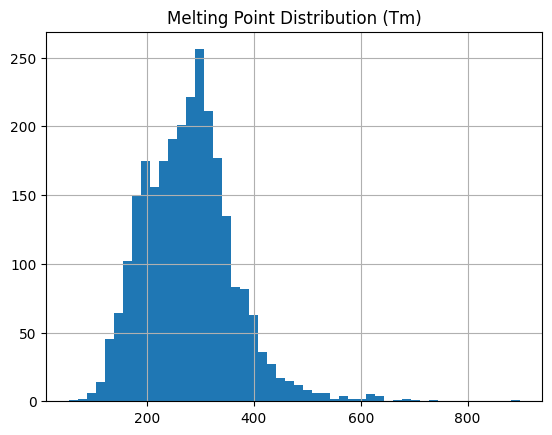

In [ ]:
import matplotlib.pyplot as plt
# Distribution of targets
data['Tm'].hist(bins=50)
ax = plt.gca()
ax.set_title("Melting Point Distribution (Tm)")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = data.drop(columns=['id','SMILES','Tm'])
y = data['Tm']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X.head()

,Group 1,Group 2,Group 3,Group 4,Group 5,Group 6,Group 7,Group 8,Group 9,Group 10,...,Group 415,Group 416,Group 417,Group 418,Group 419,Group 420,Group 421,Group 422,Group 423,Group 424
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y.head()

,Tm
0,213.15
1,407.15
2,324.15
3,351.15
4,126.15


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_val=scaler.transform(X_val)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred=model.predict(X_val)

In [ ]:
y_pred_train=model.predict(X_train)

In [ ]:
print(y_pred[:5])
print(y_pred_train[:5])

[312.48757719 212.3251394  288.17736637 319.53639741 259.72614133]
[357.65527298 307.15806973 291.19917003 277.58324597 240.88086801]


In [ ]:
#training Score
print(model.score(X_train,y_train))
#testing Score
print(model.score(X_val,y_val))

0.7109431338091914
0.5930456986727953


In [ ]:
# MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_val, y_pred)
print(f"Mean Absolute Error: {mae:.4f}")

Mean Absolute Error: 36.9047


In [ ]:
#MSE
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_val, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

Mean Squared Error: 3051.0458


In [ ]:
# GrandSearch for Random Forest
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/uti

Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best score: 0.5714753201250915


In [ ]:
# MAE for Random Forest (GridSearchCV best estimator)
from sklearn.metrics import mean_absolute_error

# Get the best estimator from GridSearchCV
best_rf_model = grid_search.best_estimator_

# Make predictions on the validation set using the best model
y_pred_grid_search = best_rf_model.predict(X_val)

# Calculate MAE
mae_grid_search = mean_absolute_error(y_val, y_pred_grid_search)

print(f"Mean Absolute Error for GridSearchCV's best Random Forest: {mae_grid_search:.4f}")

Mean Absolute Error for GridSearchCV's best Random Forest: 37.8730


In [ ]:
#random forest
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(random_state=42,)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_val)
print(f"Random Forest R2 Score: {model_rf.score(X_val, y_val):.4f}")
print(f"Random Forest MAE: {mean_absolute_error(y_val, y_pred_rf):.4f}")
print(f"Random Forest MSE: {mean_squared_error(y_val, y_pred_rf):.4f}")

Random Forest R2 Score: 0.5880
Random Forest MAE: 36.4900
Random Forest MSE: 3088.7771


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
model_gb = GradientBoostingRegressor(random_state=42)

In [ ]:
model_gb.fit(X_train, y_train)
y_pred_gb = model_gb.predict(X_val)
print(f"Gradient Boosting R2 Score: {model_gb.score(X_val, y_val):.4f}")
print(f"Gradient Boosting MAE: {mean_absolute_error(y_val, y_pred_gb):.4f}")
print(f"Gradient Boosting MSE: {mean_squared_error(y_val, y_pred_gb):.4f}")

Gradient Boosting R2 Score: 0.5087
Gradient Boosting MAE: 44.1049
Gradient Boosting MSE: 3683.7251


In [ ]:
from sklearn.
xgb_tm = xgb.XGBRegressor(tree_method='hist', n_estimators=300)
xgb_tm.fit(X_train, y_train)
tm_pred = xgb_tm.predict(X_val)
xgb_tm_mae = mean_absolute_error(y_val, tm_pred)

print("XGBoost MAE Tm:", xgb_tm_mae)